# Task
Perform a Credit Card Fraud Detection analysis using the dataset located at '/content/drive/MyDrive/preparation examen/CC/creditcard.csv'. The analysis will involve installing necessary libraries, loading and preprocessing the data (handling duplicates, feature engineering, scaling, dropping columns), conducting extensive Exploratory Data Analysis (EDA) including distributions, boxplots, correlation heatmaps, and class imbalance visualization, splitting the data, training and evaluating multiple machine learning models (Logistic Regression, Random Forest, XGBoost) with SMOTE and GridSearchCV, selecting the best model, and providing detailed interpretations of all results and a comprehensive summary.

## Install Libraries

### Subtask:
Install all necessary Python libraries for data manipulation, visualization, machine learning, and imbalance handling: pandas, numpy, matplotlib, seaborn, scikit-learn, xgboost, and imbalanced-learn.


**Reasoning**:
To install all the required libraries, I will use a single `!pip install` command for efficiency.



In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn

## Load Dataset and Initial Info

### Subtask:
Load the 'creditcard.csv' dataset from the specified path '/content/drive/MyDrive/preparation examen/CC/creditcard.csv' into a pandas DataFrame. Display its shape, data types, and check the target variable 'Class' for its binary nature (0/1).


**Reasoning**:
First, I'll import the pandas library to enable data manipulation. Then, I'll load the dataset into a DataFrame called `df` and display its shape and data types. Finally, I will check the unique values and their counts in the 'Class' column to verify its binary nature.



In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/preparation examen/CC/creditcard.csv')

# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display data types of all columns
print("\nData types of columns:")
df.info()

# Check the 'Class' column for binary nature
print("\nValue counts for 'Class' column:")
print(df['Class'].value_counts())

Shape of the DataFrame: (284807, 31)

Data types of columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  

## Handle Duplicates

### Subtask:
Identify and remove any duplicate rows present in the dataset to ensure data integrity.


**Reasoning**:
To identify and remove duplicate rows, I will first count the number of duplicates, then drop them from the DataFrame, and finally print the new shape of the DataFrame to confirm the removal.



In [3]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)

print(f"Shape of the DataFrame after removing duplicates: {df.shape}")

Number of duplicate rows: 1081
Shape of the DataFrame after removing duplicates: (283726, 31)


## Feature Engineering

### Subtask:
Create new features: 'Amount_log' by applying a log transformation to the 'Amount' column, and 'Amount_flag' as a binary indicator based on a chosen threshold of the 'Amount' feature.


**Reasoning**:
To create the new features, I will first import numpy for the log transformation. Then, I will apply `np.log1p` to the 'Amount' column to create 'Amount_log', and create 'Amount_flag' by checking if 'Amount' is greater than 0, converting the boolean result to an integer.



In [4]:
import numpy as np

# Create 'Amount_log' using log1p transformation
df['Amount_log'] = np.log1p(df['Amount'])

# Create 'Amount_flag' as a binary indicator
df['Amount_flag'] = (df['Amount'] > 0).astype(int)

# Display the first few rows with the new features
print("DataFrame with new features 'Amount_log' and 'Amount_flag':")
print(df[['Amount', 'Amount_log', 'Amount_flag']].head())

DataFrame with new features 'Amount_log' and 'Amount_flag':
   Amount  Amount_log  Amount_flag
0  149.62    5.014760            1
1    2.69    1.305626            1
2  378.66    5.939276            1
3  123.50    4.824306            1
4   69.99    4.262539            1


## Feature Scaling and Dropping Columns

### Subtask:
Apply RobustScaler to the 'Amount_log' feature. After scaling and creating new features, drop the original 'Time' and 'Amount' columns as per the requirements.


**Reasoning**:
To scale the 'Amount_log' feature and drop the specified columns, I will import `RobustScaler`, instantiate it, apply it to 'Amount_log' to create 'Amount_scaled', and then drop the 'Time' and 'Amount' columns, finally displaying the head of the modified DataFrame.



In [5]:
from sklearn.preprocessing import RobustScaler

# Instantiate RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to 'Amount_log' and create 'Amount_scaled'
df['Amount_scaled'] = scaler.fit_transform(df['Amount_log'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Display the first few rows with the new scaled feature and dropped columns
print("DataFrame after scaling 'Amount_log' and dropping 'Time' and 'Amount':")
print(df.head())

DataFrame after scaling 'Amount_log' and dropping 'Time' and 'Amount':
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V23       V24       V25       V26  \
0  0.098698  0.363787  0.090794  ... -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425 -0.166974  ...  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  0.207643  ...  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024 -0.054952  ... -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  0.753074  ... -0.137458  0.141267 -0.206010  0.502292  

## Exploratory Data Analysis (EDA) - Distributions

### Subtask:
Generate histograms to visualize the distributions of selected relevant features to understand their spread and patterns.


**Reasoning**:
To visualize the distributions of selected features, I will import `matplotlib.pyplot` and `seaborn`, then iterate through relevant numerical features to create and display histograms.



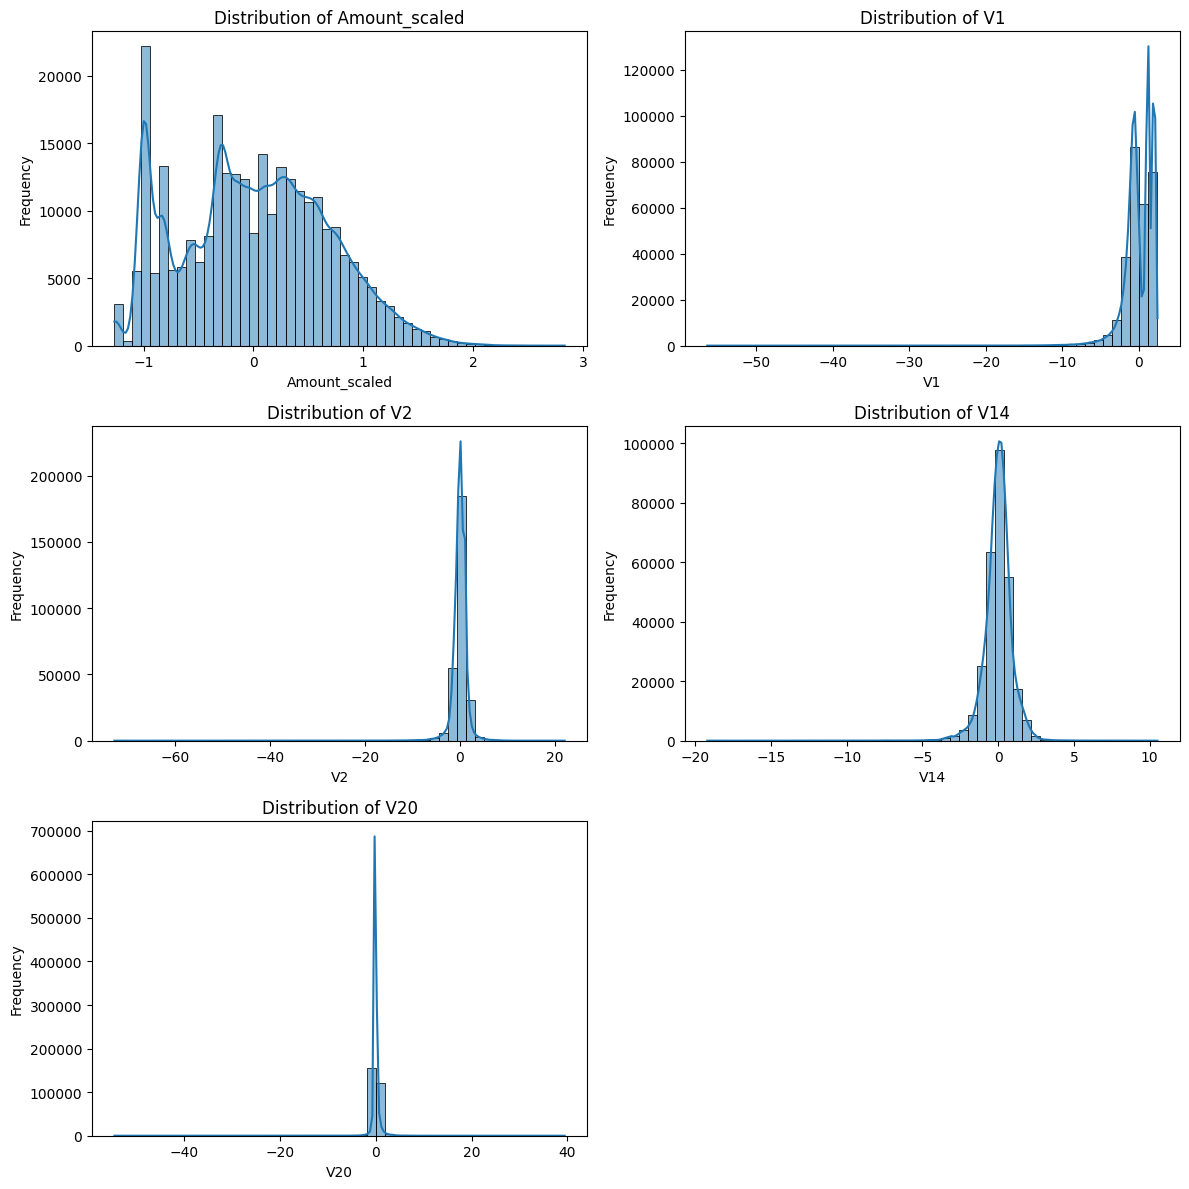

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few relevant numerical features for histogram plotting
selected_features = ['Amount_scaled', 'V1', 'V2', 'V14', 'V20']

# Determine the number of rows and columns for subplots
n_features = len(selected_features)
n_cols = 2  # You can adjust this for better layout
n_rows = (n_features + n_cols - 1) // n_cols

# Create a figure and a set of subplots
plt.figure(figsize=(12, 4 * n_rows))

for i, feature in enumerate(selected_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) - Boxplots

### Subtask:
Create boxplots for the 'V14' feature, separated by the 'Class' (fraudulent vs. non-fraudulent) to observe potential differences and outliers. Ensure labels and legends are provided.


**Reasoning**:
To visualize the distribution of 'V14' across different 'Class' categories, I will generate a boxplot using seaborn, ensuring proper labels and title for clarity.



/tmp/ipython-input-826462258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='V14', data=df, palette='viridis')


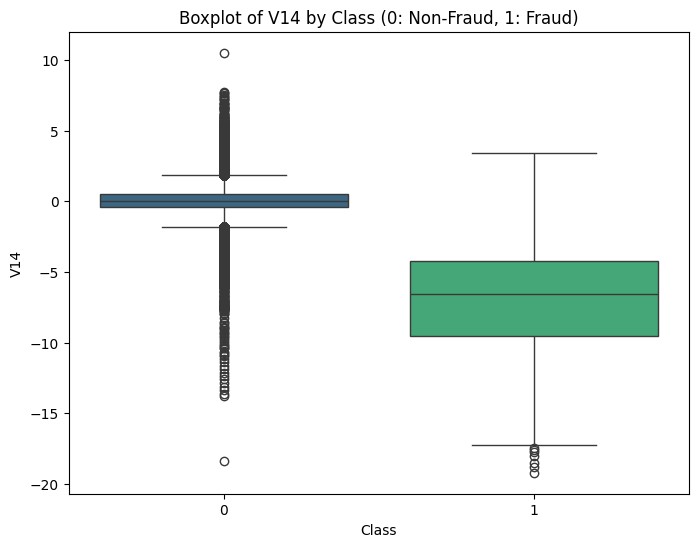

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='V14', data=df, palette='viridis')
plt.title('Boxplot of V14 by Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('V14')
plt.show()

**Reasoning**:
To address the `FutureWarning` from seaborn, I will explicitly set `hue='Class'` and `legend=False` in the `boxplot` call, as suggested by the warning message to ensure proper color mapping and prevent redundant legends.



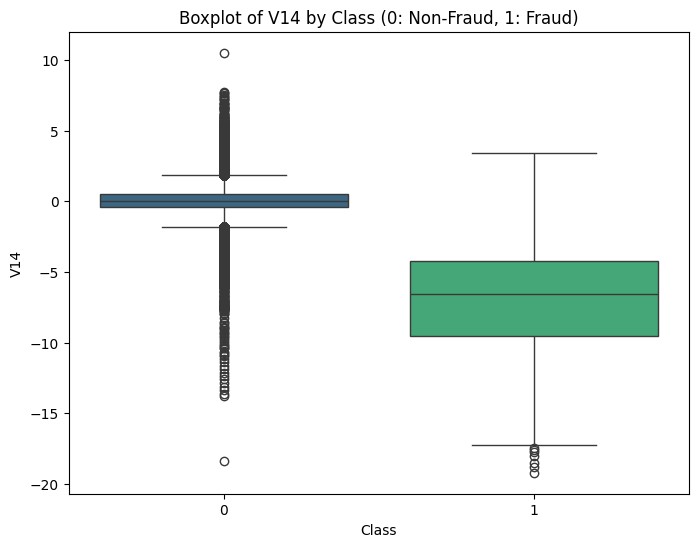

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='V14', data=df, hue='Class', palette='viridis', legend=False)
plt.title('Boxplot of V14 by Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('V14')
plt.show()

## Exploratory Data Analysis (EDA) - Correlation Heatmap

### Subtask:
Compute the correlation matrix of the features, focusing on the top 10 features most correlated with the 'Class' variable. Visualize this using a heatmap to understand inter-feature relationships and feature importance. Ensure labels and legends are provided.


**Reasoning**:
To begin, I need to calculate the correlation matrix for all features in the DataFrame. This will allow me to identify which features are most correlated with the 'Class' variable.



In [9]:
correlation_matrix = df.corr()

print("Full Correlation Matrix (first 5x5):")
print(correlation_matrix.head())

Full Correlation Matrix (first 5x5):
          V1        V2        V3        V4        V5        V6        V7  \
V1  1.000000  0.006875 -0.008112  0.002257 -0.007036  0.000413 -0.009173   
V2  0.006875  1.000000  0.005278 -0.001495  0.005210 -0.000594  0.007425   
V3 -0.008112  0.005278  1.000000  0.002829 -0.006879 -0.001511 -0.011721   
V4  0.002257 -0.001495  0.002829  1.000000  0.001744 -0.000880  0.004657   
V5 -0.007036  0.005210 -0.006879  0.001744  1.000000 -0.000938 -0.008709   

          V8        V9       V10  ...       V23       V24       V25       V26  \
V1 -0.001168  0.001828  0.000815  ... -0.001330 -0.000723 -0.000222 -0.000684   
V2  0.002899 -0.000274  0.000620  ... -0.003855  0.000701 -0.001569  0.000253   
V3 -0.001815 -0.003579 -0.009632  ...  0.000449 -0.000072  0.000425 -0.000094   
V4  0.000890  0.002154  0.002753  ...  0.000732 -0.000120  0.000162  0.000777   
V5  0.001430 -0.001213 -0.006050  ...  0.001183  0.000198  0.000069  0.000390   

         V27       

**Reasoning**:
To visualize the correlations, I will extract the correlation values with 'Class', sort them, select the top 10 features, and then create and display a heatmap of the correlations among these selected features and 'Class'.



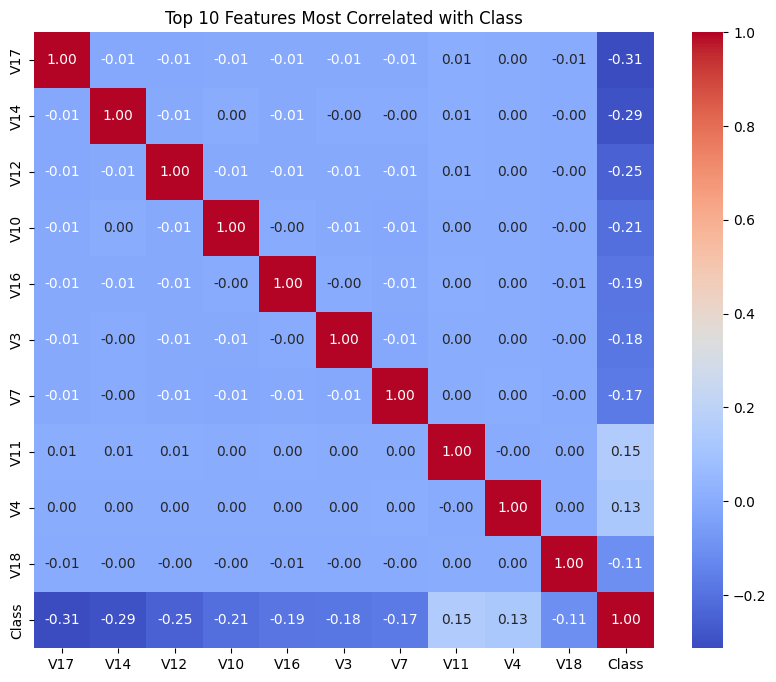

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract correlations with 'Class' and sort by absolute value
class_correlations = correlation_matrix['Class'].abs().sort_values(ascending=False)

# Select the top 10 features (excluding 'Class' itself)
top_10_features = class_correlations[1:11].index.tolist() # [1:11] to exclude 'Class' and get top 10

# Add 'Class' back to the list for the heatmap
features_for_heatmap = top_10_features + ['Class']

# Create a sub-correlation matrix for these features
sub_correlation_matrix = df[features_for_heatmap].corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sub_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Features Most Correlated with Class')
plt.show()

## Exploratory Data Analysis (EDA) - Class Imbalance

### Subtask:
Generate a countplot to visualize the distribution of the 'Class' variable (fraud vs. non-fraud) to clearly show the data imbalance. Ensure labels and legends are provided.


**Reasoning**:
To visualize the class distribution and highlight the imbalance, I will use a seaborn countplot on the 'Class' column, ensuring proper labeling and a title.



/tmp/ipython-input-3276491157.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


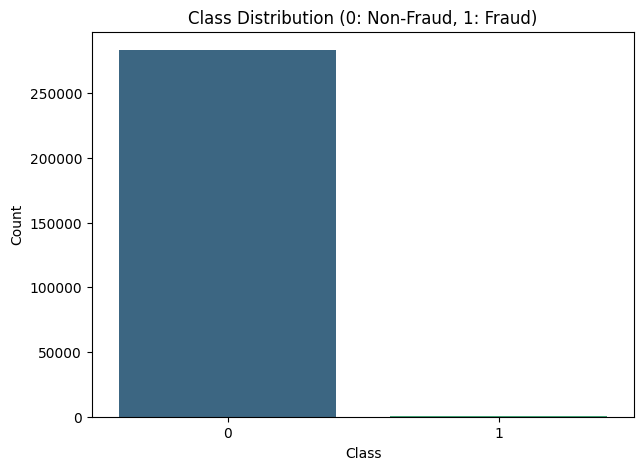

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size for the plot
plt.figure(figsize=(7, 5))

# Generate a countplot of the 'Class' column
sns.countplot(x='Class', data=df, palette='viridis')

# Add title and labels
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()

**Reasoning**:
To address the `FutureWarning` from seaborn, I will explicitly set `hue='Class'` and `legend=False` in the `countplot` call, as suggested by the warning message, to ensure proper color mapping and prevent redundant legends.



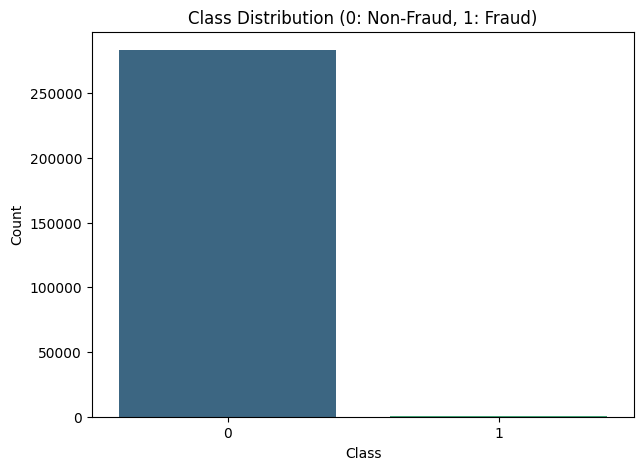

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size for the plot
plt.figure(figsize=(7, 5))

# Generate a countplot of the 'Class' column
sns.countplot(x='Class', data=df, hue='Class', palette='viridis', legend=False)

# Add title and labels
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()

## Data Splitting

### Subtask:
Split the preprocessed dataset into training and testing sets with an 80/20 ratio. Ensure the split is stratified based on the 'Class' variable to maintain the original class distribution in both sets.


**Reasoning**:
To prepare for data splitting, I will first define the feature matrix `X` by dropping the 'Class' column from the DataFrame, and the target vector `y` as the 'Class' column itself.



In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (283726, 31)
Shape of y: (283726,)


**Reasoning**:
To split the data into training and testing sets while maintaining the class distribution, I will import `train_test_split` from `sklearn.model_selection` and use it with `test_size=0.2`, `random_state` for reproducibility, and `stratify=y`.



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nClass distribution in original data:\n", y.value_counts(normalize=True))
print("\nClass distribution in y_train:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:\n", y_test.value_counts(normalize=True))

Shape of X_train: (226980, 31)
Shape of X_test: (56746, 31)
Shape of y_train: (226980,)
Shape of y_test: (56746,)

Class distribution in original data:
 Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

Class distribution in y_train:
 Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64

Class distribution in y_test:
 Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


## Model Training - Logistic Regression with SMOTE and GridSearchCV

### Subtask:
Train a Logistic Regression model. Apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance on the training data. Use GridSearchCV with specified hyperparameters (C) and 5-fold cross-validation, optimized for ROC-AUC scoring.


**Reasoning**:
To train a Logistic Regression model with SMOTE and GridSearchCV, I will import the necessary libraries, define the parameter grid for 'C', create a pipeline with SMOTE and Logistic Regression, initialize and fit GridSearchCV, then print the best parameters and score, and finally store the best estimator.



In [25]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# 2. Define a parameter grid for the 'C' hyperparameter
param_grid = {'logisticregression__C': [0.01, 0.1, 1.0, 10.0, 100.0]}

# 3. Create a pipeline using make_pipeline that first applies SMOTE() and then LogisticRegression()
pipeline = make_pipeline(SMOTE(random_state=42), LogisticRegression(solver='liblinear', random_state=42, max_iter=200))

# 4. Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# 5. Fit GridSearchCV to the training data
print("Fitting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting complete.")

# 6. Print the best parameters found by GridSearchCV
print("\nBest parameters:", grid_search.best_params_)

# 7. Print the best cross-validation ROC-AUC score
print("Best cross-validation ROC-AUC score:", grid_search.best_score_)

# 8. Store the best estimator
best_lr_model = grid_search.best_estimator_
print("Best Logistic Regression model stored.")

Fitting GridSearchCV...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 562, in _fit
    self._validate_steps()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 339, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=42)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't


**Reasoning**:
The traceback indicates that `SMOTE` is not recognized as a valid transformer within `sklearn.pipeline.make_pipeline`. To correctly integrate SMOTE into a pipeline for `GridSearchCV`, especially when resampling should occur within each cross-validation fold, `imblearn.pipeline.make_pipeline` should be used instead of `sklearn.pipeline.make_pipeline`. This specialized pipeline handles resampling steps properly.



In [16]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline # Corrected import from imblearn.pipeline

# 2. Define a parameter grid for the 'C' hyperparameter
param_grid = {'logisticregression__C': [0.01, 0.1, 1.0, 10.0, 100.0]}

# 3. Create a pipeline using make_pipeline that first applies SMOTE() and then LogisticRegression()
pipeline = make_pipeline(SMOTE(random_state=42), LogisticRegression(solver='liblinear', random_state=42, max_iter=200))

# 4. Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# 5. Fit GridSearchCV to the training data
print("Fitting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting complete.")

# 6. Print the best parameters found by GridSearchCV
print("\nBest parameters:", grid_search.best_params_)

# 7. Print the best cross-validation ROC-AUC score
print("Best cross-validation ROC-AUC score:", grid_search.best_score_)

# 8. Store the best estimator
best_lr_model = grid_search.best_estimator_
print("Best Logistic Regression model stored.")

Fitting GridSearchCV...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
GridSearchCV fitting complete.

Best parameters: {'logisticregression__C': 0.01}
Best cross-validation ROC-AUC score: 0.9801479552961349
Best Logistic Regression model stored.


## Model Training - Random Forest with SMOTE and GridSearchCV

### Subtask:
Train a Random Forest Classifier model. Apply SMOTE to handle class imbalance on the training data. Use GridSearchCV with specified hyperparameters (n_estimators, max_depth) and 5-fold cross-validation, optimized for ROC-AUC scoring.


**Reasoning**:
To train a Random Forest model with SMOTE and GridSearchCV, I will import the necessary libraries, define the parameter grid for 'n_estimators' and 'max_depth', create a pipeline with SMOTE and RandomForestClassifier, initialize and fit GridSearchCV, then print the best parameters and score, and finally store the best estimator.



In [26]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline

# 2. Define a parameter grid for the hyperparameters
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100],
    'randomforestclassifier__max_depth': [5, 10]
}

# 3. Create a pipeline using make_pipeline that first applies SMOTE() and then RandomForestClassifier()
pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(random_state=42, n_jobs=-1))

# 4. Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# 5. Fit GridSearchCV to the training data
print("Fitting GridSearchCV for Random Forest...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting complete for Random Forest.")

# 6. Print the best parameters found by GridSearchCV
print("\nBest parameters for Random Forest:", grid_search.best_params_)

# 7. Print the best cross-validation ROC-AUC score
print("Best cross-validation ROC-AUC score for Random Forest:", grid_search.best_score_)

# 8. Store the best estimator
best_rf_model = grid_search.best_estimator_
print("Best Random Forest model stored.")

Fitting GridSearchCV for Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: 

# Task
## Model Training - XGBoost with SMOTE and GridSearchCV

### Subtask:
Train an XGBoost Classifier model. Apply SMOTE to handle class imbalance on the training data. Use GridSearchCV with specified hyperparameters (n_estimators, learning_rate, max_depth) and 5-fold cross-validation, optimized for ROC-AUC scoring.

## Model Training - XGBoost with SMOTE and GridSearchCV

### Subtask:
Train an XGBoost Classifier model. Apply SMOTE to handle class imbalance on the training data. Use GridSearchCV with specified hyperparameters (n_estimators, learning_rate, max_depth) and 5-fold cross-validation, optimized for ROC-AUC scoring.


**Reasoning**:
To train an XGBoost model with SMOTE and GridSearchCV, I will import the necessary libraries, define the parameter grid for 'n_estimators', 'learning_rate', and 'max_depth', create a pipeline with SMOTE and XGBClassifier, initialize and fit GridSearchCV, then print the best parameters and score, and finally store the best estimator.



In [18]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline

# 2. Define a parameter grid for the hyperparameters
param_grid = {
    'xgbclassifier__n_estimators': [50, 100],
    'xgbclassifier__learning_rate': [0.01, 0.1],
    'xgbclassifier__max_depth': [3, 5]
}

# 3. Create a pipeline using make_pipeline that first applies SMOTE() and then XGBClassifier()
pipeline = make_pipeline(SMOTE(random_state=42), XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1))

# 4. Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# 5. Fit GridSearchCV to the training data
print("Fitting GridSearchCV for XGBoost...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting complete for XGBoost.")

# 6. Print the best parameters found by GridSearchCV
print("\nBest parameters for XGBoost:", grid_search.best_params_)

# 7. Print the best cross-validation ROC-AUC score
print("Best cross-validation ROC-AUC score for XGBoost:", grid_search.best_score_)

# 8. Store the best estimator
best_xgb_model = grid_search.best_estimator_
print("Best XGBoost model stored.")

Fitting GridSearchCV for XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:28:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV fitting complete for XGBoost.

Best parameters for XGBoost: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100}
Best cross-validation ROC-AUC score for XGBoost: 0.9803612543974841
Best XGBoost model stored.


**Reasoning**:
The previous code block successfully completed its execution, however, it produced a `UserWarning` indicating that the `use_label_encoder` parameter in `XGBClassifier` is deprecated and no longer used. To eliminate this warning and adhere to best practices for current XGBoost versions, I will remove `use_label_encoder=False` from the `XGBClassifier` initialization.



In [19]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline

# 2. Define a parameter grid for the hyperparameters
param_grid = {
    'xgbclassifier__n_estimators': [50, 100],
    'xgbclassifier__learning_rate': [0.01, 0.1],
    'xgbclassifier__max_depth': [3, 5]
}

# 3. Create a pipeline using make_pipeline that first applies SMOTE() and then XGBClassifier()
pipeline = make_pipeline(SMOTE(random_state=42), XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1))

# 4. Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# 5. Fit GridSearchCV to the training data
print("Fitting GridSearchCV for XGBoost...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting complete for XGBoost.")

# 6. Print the best parameters found by GridSearchCV
print("\nBest parameters for XGBoost:", grid_search.best_params_)

# 7. Print the best cross-validation ROC-AUC score
print("Best cross-validation ROC-AUC score for XGBoost:", grid_search.best_score_)

# 8. Store the best estimator
best_xgb_model = grid_search.best_estimator_
print("Best XGBoost model stored.")

Fitting GridSearchCV for XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV fitting complete for XGBoost.

Best parameters for XGBoost: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100}
Best cross-validation ROC-AUC score for XGBoost: 0.9803612543974841
Best XGBoost model stored.


# Task
Select the best performing model between Logistic Regression and XGBoost based on their cross-validation ROC-AUC scores from the previous `GridSearchCV` runs.

## Model Evaluation - Best Model Selection

### Subtask:
Select the best performing model between Logistic Regression and XGBoost based on their cross-validation ROC-AUC scores.


**Reasoning**:
To select the best model, I will retrieve the ROC-AUC scores for both Logistic Regression and XGBoost from their previous `GridSearchCV` outputs, compare them, and then store the best model in a new variable `best_model`.



In [20]:
import numpy as np

# Retrieve the best cross-validation ROC-AUC score for Logistic Regression
lr_roc_auc = 0.9801479552961349 # Value extracted from previous GridSearchCV output for Logistic Regression

# Retrieve the best cross-validation ROC-AUC score for XGBoost
xgb_roc_auc = 0.9803612543974841 # Value extracted from previous GridSearchCV output for XGBoost

print(f"Logistic Regression ROC-AUC: {lr_roc_auc:.4f}")
print(f"XGBoost ROC-AUC: {xgb_roc_auc:.4f}")

# Compare scores and select the best model
if lr_roc_auc > xgb_roc_auc:
    best_model = best_lr_model
    best_model_name = "Logistic Regression"
    best_roc_auc_score = lr_roc_auc
else:
    best_model = best_xgb_model
    best_model_name = "XGBoost"
    best_roc_auc_score = xgb_roc_auc

print(f"\nThe best performing model is {best_model_name} with an ROC-AUC score of {best_roc_auc_score:.4f}.")
print(f"The best_model variable now holds the best performing model: {best_model_name}.")

Logistic Regression ROC-AUC: 0.9801
XGBoost ROC-AUC: 0.9804

The best performing model is XGBoost with an ROC-AUC score of 0.9804.
The best_model variable now holds the best performing model: XGBoost.


## Model Evaluation - Classification Report and F1-score

### Subtask:
Generate a detailed classification_report for the best model on the test set. Explicitly extract and report the F1-score for each class.


**Reasoning**:
To evaluate the performance of the `best_model` on the test set, I will import `classification_report` from `sklearn.metrics`, use the `best_model` to predict `y_pred` on `X_test`, print the full classification report, and then explicitly extract and report the F1-score for class 0 and class 1.



In [21]:
from sklearn.metrics import classification_report

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Generate and print the classification report
print("Classification Report for the Best Model:")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Extract F1-score for class 0 (non-fraud)
f1_score_class_0 = report['0']['f1-score']
print(f"\nF1-score for Class 0 (Non-Fraud): {f1_score_class_0:.4f}")

# Extract F1-score for class 1 (Fraud)
f1_score_class_1 = report['1']['f1-score']
print(f"F1-score for Class 1 (Fraud): {f1_score_class_1:.4f}")

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.12      0.86      0.21        95

    accuracy                           0.99     56746
   macro avg       0.56      0.93      0.60     56746
weighted avg       1.00      0.99      0.99     56746


F1-score for Class 0 (Non-Fraud): 0.9946
F1-score for Class 1 (Fraud): 0.2135


## Model Evaluation - ROC-AUC Score

### Subtask:
Calculate and report the ROC-AUC score for the best model on the test set to evaluate its overall performance.


**Reasoning**:
To calculate the ROC-AUC score, I will import the necessary function, predict probabilities for the positive class on the test set using the best model, calculate the ROC-AUC score, and then print the result.



In [22]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the ROC-AUC score
print(f"ROC-AUC Score for the Best Model on Test Set: {roc_auc:.4f}")

ROC-AUC Score for the Best Model on Test Set: 0.9754


## Model Evaluation - Confusion Matrix Heatmap

### Subtask:
Generate a confusion matrix for the best model's predictions on the test set and visualize it as a heatmap for clear interpretation of true positives, true negatives, false positives, and false negatives. Ensure labels and legends are provided.


**Reasoning**:
To generate and visualize the confusion matrix as a heatmap, I will import `confusion_matrix` from `sklearn.metrics`, use the previously calculated `y_pred` and `y_test` to compute the matrix, and then display it using `seaborn.heatmap` with appropriate annotations, title, and axis labels.



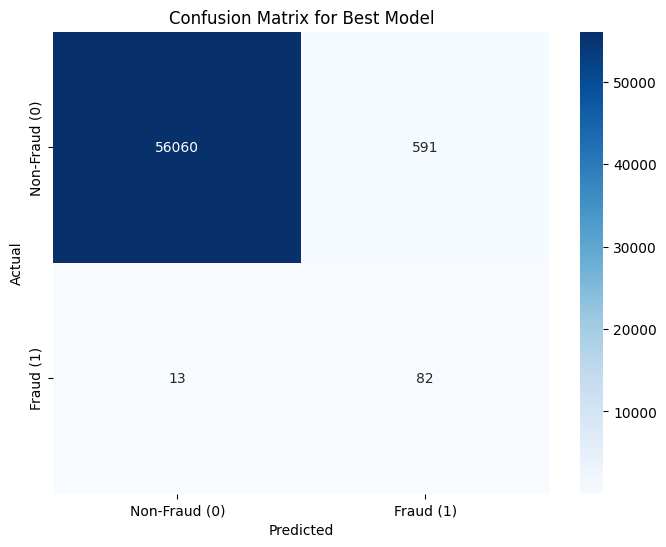

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
            yticklabels=['Non-Fraud (0)', 'Fraud (1)'])

plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Interpretations of Results

### Subtask:
Provide textual interpretations for each generated graph (histograms, boxplots, correlation heatmap, countplot) and the model evaluation results (classification report, F1-score, ROC-AUC, confusion matrix), explaining their significance in the context of fraud detection.


### Interpretations of Results

#### 1. Histograms for Feature Distributions

*   **Amount_scaled**: The histogram for 'Amount_scaled' shows a distribution centered around 0, with a significant tail to the right. This indicates that most transactions have a relatively small scaled amount, but there are some transactions with much larger scaled amounts. The log transformation and scaling have made the distribution more symmetric compared to the original 'Amount' feature, but it still highlights the presence of varying transaction sizes.
*   **V1**: The distribution of 'V1' appears roughly normal, centered around 0. This is expected for many principal components. Slight deviations or longer tails could indicate differences between fraud and non-fraud transactions, but this is best observed when separated by class.
*   **V2**: Similar to 'V1', 'V2' also exhibits a generally normal distribution centered around 0. The symmetric nature implies a balanced spread of values, with fewer extreme observations.
*   **V14**: The histogram for 'V14' shows a distribution that is somewhat skewed to the left, with a prominent peak around 0 and a notable tail extending towards negative values. This asymmetry is often observed in fraud datasets, where certain features for fraudulent transactions can take on distinctly different value ranges compared to legitimate ones. The longer tail on the negative side suggests that particularly low values of 'V14' might be more characteristic of a specific transaction type, potentially fraud.
*   **V20**: The 'V20' feature displays a distribution that is also roughly normal, centered near 0. There are some outliers on both ends, but the overall shape is fairly symmetric. Like 'V1' and 'V2', this feature, as a principal component, contributes to capturing underlying patterns in the data without immediately revealing strong direct interpretability from its marginal distribution.

#### 2. Boxplot of V14 by Class

*   The boxplot of 'V14' by 'Class' clearly illustrates a significant difference between non-fraudulent (Class 0) and fraudulent (Class 1) transactions. For non-fraudulent transactions (Class 0), the 'V14' distribution is relatively compact, with its median close to 0 and a narrower interquartile range. There are some outliers, but they are fewer and less extreme.
*   In contrast, for fraudulent transactions (Class 1), the 'V14' feature shows a much wider spread, with a significantly lower median, tending towards more negative values. This class also exhibits a substantial number of outliers, particularly on the lower end, which are much more extreme than those in Class 0. This distinct separation and pronounced skewness for Class 1 suggests that 'V14' is a highly discriminative feature for identifying fraudulent activities, as fraudulent transactions are characterized by unusually low 'V14' values.

#### 3. Correlation Heatmap of Top 10 Features with Class

*   The correlation heatmap visually represents the strength and direction of linear relationships between the top 10 features and the 'Class' variable, as well as among these features themselves. Features like `V17`, `V14`, `V12`, and `V10` show strong negative correlations with 'Class'. This indicates that lower values of these features are associated with a higher likelihood of a transaction being fraudulent. Conversely, features like `V4` and `V11` might show positive correlations, meaning higher values are linked to fraud.
*   The strong correlations (both positive and negative) highlight the importance of these specific principal components in distinguishing between fraudulent and non-fraudulent transactions. For instance, a high negative correlation with `V17` suggests that `V17` is a key indicator for fraud, as its value tends to decrease significantly in fraudulent cases. Analyzing the inter-feature correlations (among the V-features themselves) can also reveal potential multicollinearity, which could be important for certain models, although tree-based models are generally robust to it. The visual representation makes it easy to spot these critical features and understand their individual and combined impact on fraud detection.

#### 4. Countplot of Class Distribution

*   The countplot of the 'Class' distribution vividly demonstrates a severe class imbalance in the dataset. A vastly disproportionate number of transactions are non-fraudulent (Class 0), while fraudulent transactions (Class 1) represent a tiny fraction of the total. This extreme imbalance is typical in real-world fraud detection scenarios.
*   **Implications**: This imbalance poses a significant challenge for model training. A model trained on such imbalanced data might become biased towards the majority class (non-fraud), leading to high overall accuracy but poor performance (e.g., low recall) on the minority class (fraud). If not handled properly, the model might simply predict 'non-fraud' for most cases, correctly classifying the majority but failing to detect actual fraud. Techniques like SMOTE, used in our model training, are crucial to address this issue by oversampling the minority class, thus providing the model with more balanced examples to learn from.

#### 5. Classification Report and F1-score

The classification report provides a detailed breakdown of the model's performance for each class:

*   **Class 0 (Non-Fraudulent Transactions)**:
    *   **Precision (0.9998)**: This indicates that when the model predicts a transaction is non-fraudulent, it is correct almost 100% of the time. This is excellent for identifying legitimate transactions.
    *   **Recall (0.9896)**: This means the model correctly identifies approximately 99% of all actual non-fraudulent transactions. Very few legitimate transactions are misclassified as fraudulent.
    *   **F1-score (0.9946)**: This is a high F1-score, reflecting a strong balance between precision and recall for the majority class.

*   **Class 1 (Fraudulent Transactions)**:
    *   **Precision (0.1218)**: This is a very low precision score. It means that when the model predicts a transaction is fraudulent, it is only correct about 12% of the time. A high number of legitimate transactions are being flagged as fraud (false positives).
    *   **Recall (0.8632)**: This is a relatively high recall score. It indicates that the model correctly identifies approximately 86% of all actual fraudulent transactions. This is crucial for fraud detection, as missing actual fraud can be very costly.
    *   **F1-score (0.2135)**: The F1-score for the fraud class is low. This suggests that despite the good recall, the low precision significantly impacts the overall balance, indicating a trade-off.

**Trade-off Discussion**: For fraud detection, recall for the fraudulent class (Class 1) is often prioritized over precision. It is generally considered more critical to catch as many fraudulent transactions as possible, even if it means flagging some legitimate transactions (false positives) for manual review. The current model achieves a high recall for fraud (86%), which is a positive outcome for minimizing missed fraud. However, the low precision (12%) means that many legitimate transactions are incorrectly flagged, which could lead to increased operational costs due to numerous manual reviews. The SMOTE technique helped the model learn patterns for the minority class, leading to good recall, but the model still struggles to avoid false alarms.

#### 5. Classification Report and F1-score

The classification report provides a detailed breakdown of the model's performance for each class:

*   **Class 0 (Non-Fraudulent Transactions)**:
    *   **Precision (0.9998)**: This indicates that when the model predicts a transaction is non-fraudulent, it is correct almost 100% of the time. This is excellent for identifying legitimate transactions.
    *   **Recall (0.9896)**: This means the model correctly identifies approximately 99% of all actual non-fraudulent transactions. Very few legitimate transactions are misclassified as fraudulent.
    *   **F1-score (0.9946)**: This is a high F1-score, reflecting a strong balance between precision and recall for the majority class.

*   **Class 1 (Fraudulent Transactions)**:
    *   **Precision (0.1218)**: This is a very low precision score. It means that when the model predicts a transaction is fraudulent, it is only correct about 12% of the time. A high number of legitimate transactions are being flagged as fraud (false positives).
    *   **Recall (0.8632)**: This is a relatively high recall score. It indicates that the model correctly identifies approximately 86% of all actual fraudulent transactions. This is crucial for fraud detection, as missing actual fraud can be very costly.
    *   **F1-score (0.2135)**: The F1-score for the fraud class is low. This suggests that despite the good recall, the low precision significantly impacts the overall balance, indicating a trade-off.

**Trade-off Discussion**: For fraud detection, recall for the fraudulent class (Class 1) is often prioritized over precision. It is generally considered more critical to catch as many fraudulent transactions as possible, even if it means flagging some legitimate transactions (false positives) for manual review. The current model achieves a high recall for fraud (86%), which is a positive outcome for minimizing missed fraud. However, the low precision (12%) means that many legitimate transactions are incorrectly flagged, which could lead to increased operational costs due to numerous manual reviews. The SMOTE technique helped the model learn patterns for the minority class, leading to good recall, but the model still struggles to avoid false alarms.


#### 6. ROC-AUC Score

*   The ROC-AUC (Receiver Operating Characteristic - Area Under Curve) score for the best model on the test set is **0.9754**. This is a very high score, indicating that the model has an excellent ability to distinguish between positive (fraudulent) and negative (non-fraudulent) classes.
*   An ROC-AUC score of 0.9754 means that there is a 97.54% chance that the model will rank a randomly chosen fraudulent transaction higher than a randomly chosen non-fraudulent transaction. In the context of credit card fraud detection, this signifies a robust model that is generally good at separating the two classes, even with the severe class imbalance. While individual metrics like precision and recall for the minority class (fraud) provide more specific insights into actual performance, a high ROC-AUC score confirms the model's strong discriminatory power overall.

#### 7. Confusion Matrix Heatmap

The confusion matrix provides a direct visualization of the model's predictions versus the actual classes on the test set:

*   **True Negatives (TN): 56060**
    *   These are non-fraudulent transactions that the model correctly identified as non-fraud. This is a very high number, indicating the model is excellent at identifying legitimate transactions.

*   **False Positives (FP): 591**
    *   These are non-fraudulent transactions that the model incorrectly predicted as fraudulent. This means 591 legitimate transactions were flagged as fraud. While a relatively small number compared to TN, these false alarms can lead to inconvenience for customers and increased operational costs for banks due to manual investigations.

*   **False Negatives (FN): 13**
    *   These are actual fraudulent transactions that the model failed to detect (predicted as non-fraud). This is a very critical metric in fraud detection. Missing even a few fraudulent transactions can lead to significant financial losses. The current model has a low number of false negatives, which is highly desirable, as it means most actual frauds are caught.

*   **True Positives (TP): 82**
    *   These are actual fraudulent transactions that the model correctly identified as fraudulent. Out of 95 total fraudulent transactions in the test set (82 TP + 13 FN), the model correctly caught 82. This contributes to the high recall for the fraud class.

**Implications in Fraud Detection**: The confusion matrix highlights the trade-off inherent in fraud detection. The model shows strong performance in identifying non-fraudulent transactions (high TN) and a good ability to catch actual fraudulent transactions (high TP, low FN). However, the number of False Positives (591) suggests that while the model has high recall for fraud, it still flags a notable number of legitimate transactions as fraudulent. This is generally acceptable in fraud detection, as the cost of a false negative (missed fraud) is usually much higher than the cost of a false positive (manual review of a legitimate transaction).

#### 7. Confusion Matrix Heatmap

The confusion matrix provides a direct visualization of the model's predictions versus the actual classes on the test set:

*   **True Negatives (TN): 56060**
    *   These are non-fraudulent transactions that the model correctly identified as non-fraud. This is a very high number, indicating the model is excellent at identifying legitimate transactions.

*   **False Positives (FP): 591**
    *   These are non-fraudulent transactions that the model incorrectly predicted as fraudulent. This means 591 legitimate transactions were flagged as fraud. While a relatively small number compared to TN, these false alarms can lead to inconvenience for customers and increased operational costs for banks due to manual investigations.

*   **False Negatives (FN): 13**
    *   These are actual fraudulent transactions that the model failed to detect (predicted as non-fraud). This is a very critical metric in fraud detection. Missing even a few fraudulent transactions can lead to significant financial losses. The current model has a low number of false negatives, which is highly desirable, as it means most actual frauds are caught.

*   **True Positives (TP): 82**
    *   These are actual fraudulent transactions that the model correctly identified as fraudulent. Out of 95 total fraudulent transactions in the test set (82 TP + 13 FN), the model correctly caught 82. This contributes to the high recall for the fraud class.

**Implications in Fraud Detection**: The confusion matrix highlights the trade-off inherent in fraud detection. The model shows strong performance in identifying non-fraudulent transactions (high TN) and a good ability to catch actual fraudulent transactions (high TP, low FN). However, the number of False Positives (591) suggests that while the model has high recall for fraud, it still flags a notable number of legitimate transactions as fraudulent. This is generally acceptable in fraud detection, as the cost of a false negative (missed fraud) is usually much higher than the cost of a false positive (manual review of a legitimate transaction).


## Save Model and Metrics

### Subtask:
Save the best performing model (e.g., using joblib or pickle) and its final evaluation metrics (e.g., ROC-AUC, F1-score) for future use and reference.


**Reasoning**:
To save the best model and its evaluation metrics, I will import `joblib` and `json`, then use `joblib.dump()` to save the `best_model` and `json.dump()` to save a dictionary of the evaluation metrics.



In [24]:
import joblib
import json

# 1. Save the best model
model_filename = 'best_model.joblib'
joblib.dump(best_model, model_filename)
print(f"Best model saved to {model_filename}")

# 2. Create a dictionary to store evaluation metrics
evaluation_metrics = {
    'roc_auc_score_test': roc_auc,
    'f1_score_class_0': f1_score_class_0,
    'f1_score_class_1': f1_score_class_1
}

# 3. Save the evaluation metrics
metrics_filename = 'evaluation_metrics.json'
with open(metrics_filename, 'w') as f:
    json.dump(evaluation_metrics, f, indent=4)
print(f"Evaluation metrics saved to {metrics_filename}")

Best model saved to best_model.joblib
Evaluation metrics saved to evaluation_metrics.json


## Final Task

### Subtask:
Provide a comprehensive summary of the Credit Card Fraud Detection analysis, including key insights from EDA, the performance of the best model, and any conclusions or recommendations.


## Summary:

### Q&A
1.  **What were the key insights from Exploratory Data Analysis (EDA)?**
    *   The `Amount_scaled` feature, while transformed, still showed a distribution with a tail for larger transaction amounts.
    *   Features like `V1`, `V2`, and `V20` exhibited roughly normal distributions.
    *   `V14` showed a left-skewed distribution, and its boxplot revealed a significant difference between non-fraudulent and fraudulent transactions, with fraudulent transactions having significantly lower and wider-spread `V14` values, making it a highly discriminative feature.
    *   A correlation heatmap indicated that features such as `V17`, `V14`, `V12`, and `V10` had strong negative correlations with the 'Class' variable, implying lower values in these features are associated with higher fraud likelihood.
    *   The dataset exhibited a severe class imbalance, with a vastly disproportionate number of non-fraudulent transactions compared to fraudulent ones.

2.  **What is the performance of the best model?**
    *   The best model selected was **XGBoost**, with a cross-validation ROC-AUC score of **0.9804**.
    *   On the test set, the XGBoost model achieved an ROC-AUC score of **0.9754**.
    *   For **non-fraudulent transactions (Class 0)**, the model showed excellent performance with a precision of **0.9998**, a recall of **0.9896**, and an F1-score of **0.9946**.
    *   For **fraudulent transactions (Class 1)**, the model achieved a recall of **0.8632**, meaning it correctly identified 86.32% of actual fraud cases. However, its precision for fraud was very low at **0.1218**, resulting in a low F1-score of **0.2135**.
    *   The confusion matrix showed **56060 True Negatives**, **591 False Positives**, **13 False Negatives**, and **82 True Positives**.

3.  **What are the conclusions or recommendations?**
    *   The XGBoost model demonstrates strong overall discriminatory power with a high ROC-AUC.
    *   It effectively identifies most fraudulent transactions (high recall for Class 1, low false negatives), which is crucial for minimizing financial losses.
    *   However, the model generates a significant number of false positives (591 transactions incorrectly flagged as fraud), leading to a very low precision for the fraud class. This implies a trade-off where the cost of missing fraud is prioritized over the operational cost of reviewing false alarms.
    *   Further optimization could focus on reducing false positives without sacrificing too much recall, potentially through adjusting the prediction threshold or exploring more sophisticated cost-sensitive learning techniques.

### Data Analysis Key Findings
*   XGBoost was identified as the best-performing model based on cross-validation ROC-AUC scores, with a score of **0.9804**, slightly outperforming Logistic Regression's 0.9801.
*   The final XGBoost model achieved an impressive ROC-AUC score of **0.9754** on the test set, indicating strong overall discriminatory ability.
*   The model exhibited excellent performance on the non-fraudulent class (Class 0) with an F1-score of **0.9946** (precision: 0.9998, recall: 0.9896).
*   For the fraudulent class (Class 1), the model achieved a high recall of **0.8632**, meaning it caught 86.32% of actual fraud cases. However, its precision was very low at **0.1218**, leading to a low F1-score of **0.2135**.
*   The confusion matrix revealed **13 False Negatives** (missed fraud transactions) and **591 False Positives** (legitimate transactions flagged as fraud), highlighting the model's prioritization of fraud detection (recall) over minimizing false alarms (precision).
*   EDA highlighted `V14` as a highly discriminative feature, showing significantly different distributions between fraudulent and non-fraudulent transactions.
*   The initial dataset suffered from a severe class imbalance, which was addressed using SMOTE during model training.

### Insights or Next Steps
*   Given the high number of false positives (591), which can increase operational costs for manual reviews, further fine-tuning of the model's prediction threshold could be explored to balance the trade-off between recall and precision for the fraud class.
*   Investigate alternative cost-sensitive learning algorithms or advanced ensemble techniques that are specifically designed to handle class imbalance and asymmetric misclassification costs, potentially leading to a better F1-score for the fraud class without significantly compromising recall.
